<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


In [6]:
df.to_csv('temp.csv')

In [8]:
df.iloc[28]

Country (region)            Qatar
Ladder                         29
SD of Ladder                   86
Positive affect               NaN
Negative affect               NaN
Social support                NaN
Freedom                       NaN
Corruption                    NaN
Generosity                    NaN
Log of GDP\nper capita          1
Healthy life\nexpectancy       43
Name: 28, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [10]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

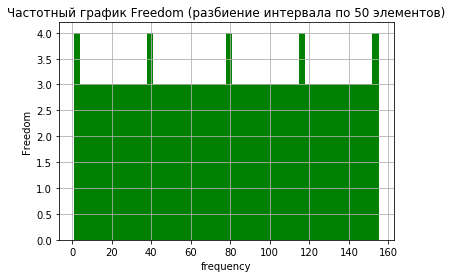

In [14]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

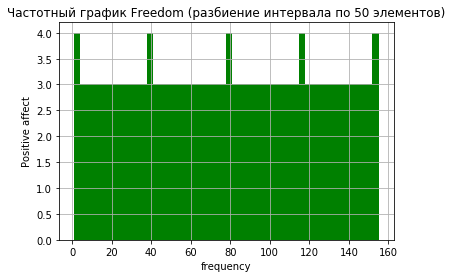

In [13]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Positive affect'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [15]:
Freedom = df['Freedom']

In [16]:
print('Медиана: ', statistics.median(Freedom))

Медиана:  71.0


In [17]:
print('Значение моды: ', statistics.mode(Freedom)

SyntaxError: unexpected EOF while parsing (<ipython-input-17-e06ceb39e08e>, line 1)

In [18]:
statistics.mean(Freedom)


nan

In [19]:
sum(Freedom)/len(Freedom)

nan

In [20]:
statistics.pvariance(Freedom)

nan

In [21]:
min(Freedom)

1.0

In [22]:
max(Freedom)

155.0

In [23]:
Freedom_range = max(Freedom) - min(Freedom)
print(Freedom_range)

154.0


In [24]:
Freedom.isnull().sum()

1

In [25]:
df.iloc[28]

Country (region)            Qatar
Ladder                         29
SD of Ladder                   86
Positive affect               NaN
Negative affect               NaN
Social support                NaN
Freedom                       NaN
Corruption                    NaN
Generosity                    NaN
Log of GDP\nper capita          1
Healthy life\nexpectancy       43
Name: 28, dtype: object

In [26]:
np.where(Freedom==np.NaN)

(array([], dtype=int64),)

Почему нельзя найти моду?

Моду нельзя найти, потому что здесь несколько мод - пять.
Вывожу гипотезу: методами, изученными на лекции все моды не получишь.
Вывод: методы, с помощью которых можно будет получить все моды,
будут изучены на следующих лекциях. А может дело в отсутствующих значениях (Qatar).
Так оно и оказалось, считаю коээфициент Пирсона, и вдруг:
ValueError: array must not contain infs or NaNs
Всё, буду удалять Qatar и заново попробую всё посчитать. И сверху, и снизу!
И тут допишу.

In [88]:
#whr2019 = df.copy()
#whr2019.drop(whr2019.index[whr2019['Freedom'] == 0], inplace = True)
#whr2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.6+ KB


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

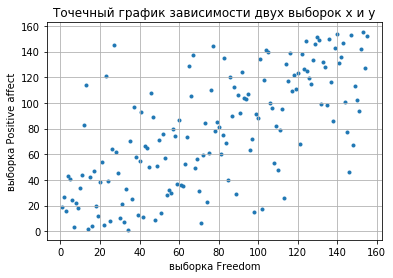

In [27]:
Freedom = df['Freedom']
Positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.')

In [28]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Freedom, Positive_affect)
print(corr) # Пока не нашли и не удалили выброс будет
#такое безобразие:

ValueError: array must not contain infs or NaNs

Начнём борьбу с выбросами!!!

In [29]:
whr2019 = df.copy()
#whr2019.dropna()
print(whr2019.shape)

(156, 11)


In [30]:
whr2019['Freedom'].isnull().sum()

1

In [31]:
whr2019['Positive affect'].isnull().sum()

1

In [33]:
whr2019.iloc[28]

Country (region)            Qatar
Ladder                         29
SD of Ladder                   86
Positive affect               NaN
Negative affect               NaN
Social support                NaN
Freedom                       NaN
Corruption                    NaN
Generosity                    NaN
Log of GDP\nper capita          1
Healthy life\nexpectancy       43
Name: 28, dtype: object

In [36]:
Freedom_whr = whr2019['Freedom']

In [37]:
Positive_affect_whr = whr2019['Positive affect']

In [38]:
Freedom_whr

0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
       ...  
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 156, dtype: float64

In [39]:
Positive_affect_whr

0       41.0
1       24.0
2       16.0
3        3.0
4       12.0
       ...  
151     54.0
152     78.0
153    152.0
154    132.0
155    127.0
Name: Positive affect, Length: 156, dtype: float64

In [40]:
del Freedom_whr [28] # del Positive_affect_whr [28]
#Интересная особенность, удаляю строчку (данные в столбце),
#удаляется целиком информация по всей изначальной (хотя и скопированной)
#таблицы, поэтому и второй закомментированный del выдаёт ошибку.

In [43]:
Freedom_whr

0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
       ...  
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 155, dtype: float64

In [44]:
Positive_affect_whr

0       41.0
1       24.0
2       16.0
3        3.0
4       12.0
       ...  
151     54.0
152     78.0
153    152.0
154    132.0
155    127.0
Name: Positive affect, Length: 155, dtype: float64

In [45]:
whr2019['Freedom'].isnull().sum()

0

In [46]:
whr2019['Positive affect'].isnull().sum()

0

Теперь у нас данные в столбцах валидные, нет
отсутсвующих значений. Снова попробуем высчитать
параметры для колонки Freedom и другие задания выполнить.

Значения немного поменяются, поскольку мы удалили из
рассмотрения явный ВЫБРОС и это страна Qatar!!!

Частотный график нет нужды перерисовывать, практически не изменится.

In [48]:
statistics.median(Freedom_whr) # например изменилась медиана распределения

78.0

In [49]:
statistics.mode(Freedom_whr) # Характер распределения по прежнему не даёт возможности
# найти моду.

StatisticsError: no unique mode; found 155 equally common values

In [52]:
statistics.mean(Freedom_whr) # Такое теперь среднее, после удаления выброса,
#а было nan.

78.0

In [53]:
sum(Freedom_whr)/len(Freedom_whr) # Проверка, как на лекции.

78.0

In [54]:
import statistics
statistics.pvariance(Freedom_whr) #дисперсия

2002.0

In [56]:
min(Freedom_whr)

1.0

In [58]:
max(Freedom_whr)

155.0

In [62]:
Freedom_range = max(Freedom_whr) - min(Freedom_whr)
print('Размах:', Freedom_range)

Размах: 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

(но для данных без выброса)

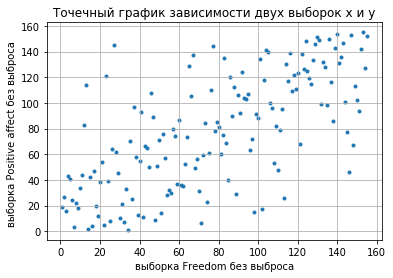

In [61]:
plt.xlabel('выборка Freedom без выброса')
plt.ylabel('выборка Positive affect без выброса ')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(Freedom_whr, Positive_affect_whr, marker='.')

In [64]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Freedom_whr, Positive_affect_whr)
print('После чистки данных считается коэффициент корреляции Пирсона:', corr)

После чистки данных считается коэффициент корреляции Пирсона: 0.6817698430601657


[Наблюдается заметная сила корреляционной связи (таблица Чеддока).](https://medstatistic.ru/theory/pirson.html)

[Связь положительная прямая](https://statanaliz.info/statistica/korrelyaciya-i-regressiya/linejnyj-koefficient-korrelyacii-pirsona/)

То есть прямая зависимость: свободны и счастливы!

Нормализовать данные колонки Freedom (централизация + масштабирование)

Работаю уже для данных Freedom_whr  (без выброса, без Qatar)

Операция центрирования

In [66]:
Freedom_whr = whr2019['Freedom']
print(statistics.mean(Freedom_whr))

78.0


In [68]:
Freedom_whr_1 = Freedom_whr - statistics.mean(Freedom_whr)
print(statistics.mean(Freedom_whr_1)) # Видимо это на лекции почти
#равнялось нулю, чтобы показать точность нахождения среднего.
#у нас тут 0.0... 
#Хотя мы здесь сместили данные и теперь у нового столбца уже
#уже среднне значение будет нулём.

0.0


Так как среднее значение не равно 0, необходимо нормализовать.

У нас среднее значение 78.0

Масштабирование выборки

Разброс данных приводим к виду (0,1) либо (-1,1)

Поскольку данные положительные, можно привести к (0, 1)
Но центрирование возможно подразумевает центром 0,
то можно и привести и к (-1, 1),
всеровно внутри этих интервалов данные будут заполнены
согласно изначальному положению дел. Там плотнее,
там реже. В силу масштаба попадут в желанный диапазон.
И опять же среднее значение у нас уже ноль. Поэтому
по условию задачи выбираем интервал (-1, 1)

In [72]:
min(Freedom_whr_1)

-77.0

In [73]:
max(Freedom_whr_1)

77.0

In [74]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
Freedom_whr_2 = min_max_scaler.fit_transform(np.array(Freedom_whr_1).reshape(-1, 1))
print(min(Freedom_whr_2))
print(max(Freedom_whr_2))

[-1.]
[1.]


Хвала третьей строчке кода, именно там мы берём смещённый массив данных и делаем
reshape в интервал (-1, 1)

Построить матрицу корреляций для всех колонок таблицы

Матрицу корреляций сделал для исходной таблицы, где есть малая толика nan значений,
что практически не влияет на результат.

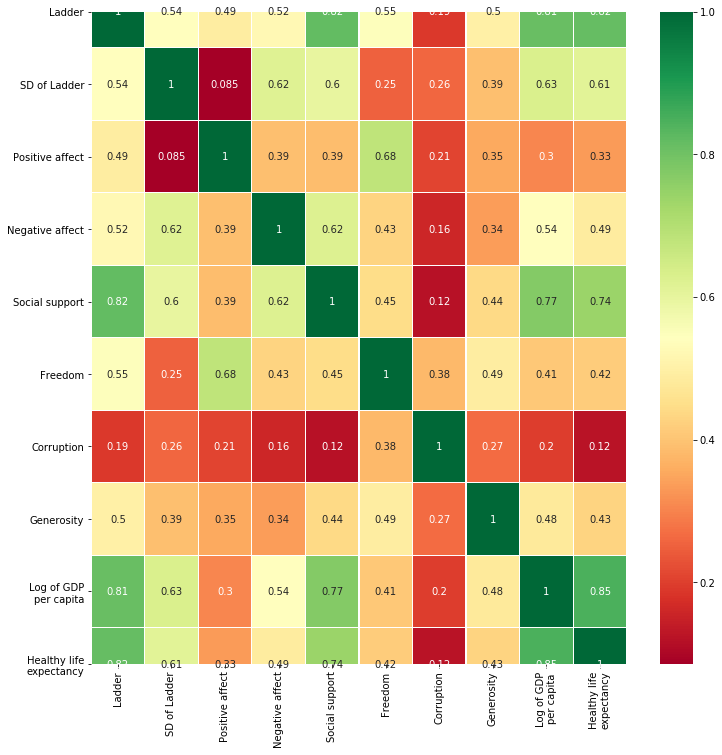

In [75]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [76]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

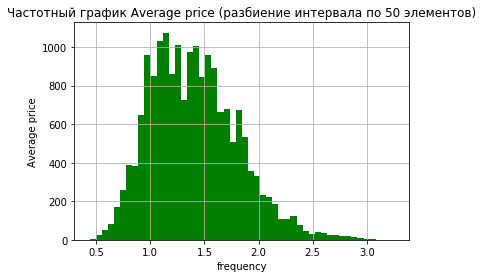

In [77]:
#import matplotlib.pyplot as plt
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Average price')
plt.title('Частотный график Average price (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Наблюдаем нормальное распределение СреднихЦен на авокадо.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

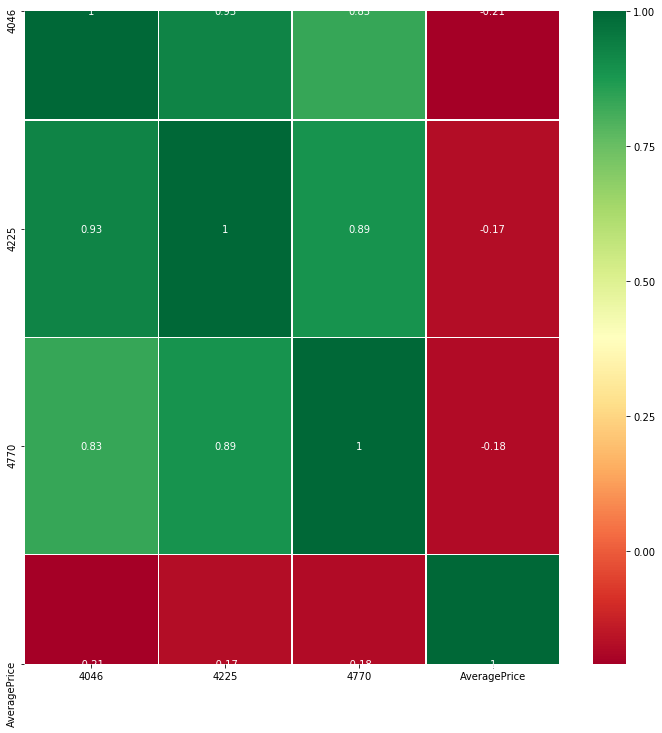

In [81]:
import seaborn as sns
sns.heatmap(df[['4046', '4225', '4770', 'AveragePrice']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Разные виды Авокадо друг с дружкой высоко и даже весьма высоко коррелируют.
Это значит, что покупатель заинтересован в Авокадо.
И берёт всё, что попадёт ему под руку. Это прекрасно.
Не разборчивый. Хотя, если покупатель берёт сорт 4046, то он добавит в
корзиночку скорей сорт 4225, чем 4770.
А вот у средней цены со спросом на авокадо обратная ситуация.
Обратная зависимость. Видимо был крупный завоз авокадо, покупатели
набросились на товар, завоз не прекращается. Покупательная способность
растёт, средняя цена падает.

В целом всё по домашке.